## Example case with feelings.

We load a file containing a list of the most common feelings. Then we parse the definitions and build the tree.

In [1]:
%load_ext autoreload
%autoreload 2

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import os
import json
%matplotlib qt 

from thothsnehet.dictionary_crawler import DictionaryCrawler

from thothsnehet.utils.basic import merge_dictionaries, get_unique_words, get_all_text_from_definitions

In [2]:
dictionary_source = "oxford"
storage_path = "./definitions/"
dictionary_crawler = DictionaryCrawler(storage_path, dictionary_source)

## Choose the example

Aristoteles started with the animals!

In [3]:
example = "animals" # feelings

In [4]:


words_list_file = f"../data/{example}.txt"  
f = open(words_list_file, "r")

words = f.read().split("\n")
words = [x for x in words if " " not in x]

In [5]:
", ".join(words)

'Canidae, Felidae, Cat, Cattle, Dog, Donkey, Goat, Horse, Pig, Rabbit, Aardvark, Aardwolf, Albatross, Alligator, Alpaca, Amphibian, list, Anaconda, Angelfish, Anglerfish, Ant, Anteater, Antelope, Antlion, Ape, Aphid, Armadillo, Asp, Baboon, Badger, Bandicoot, Barnacle, Barracuda, Basilisk, Bass, Bat, Bear, list, Beaver, Bedbug, Bee, Beetle, Bird, list, Bison, Blackbird, Boa, Boar, Bobcat, Bobolink, Bonobo, Booby, Bovid, Bug, Butterfly, Buzzard, Camel, Canid, Capybara, Cardinal, Caribou, Carp, Cat, list, Catshark, Caterpillar, Catfish, Cattle, list, Centipede, Cephalopod, Chameleon, Cheetah, Chickadee, Chicken, list, Chimpanzee, Chinchilla, Chipmunk, Clam, Clownfish, Cobra, Cockroach, Cod, Condor, Constrictor, Coral, Cougar, Cow, Coyote, Crab, Crane, Crawdad, Crayfish, Cricket, Crocodile, Crow, Cuckoo, Cicada, Damselfly, Deer, Dingo, Dinosaur, list, Dog, list, Dolphin, Donkey, list, Dormouse, Dove, Dragonfly, Dragon, Duck, list, Eagle, Earthworm, Earwig, Echidna, Eel, Egret, Elephant, E

## 2. Download the first level of definitions

In [6]:
output, error, return_code =dictionary_crawler.crawl_definitions(words, f"{example}.jl",verbose = 1)

Processing the words:  ['Canidae', 'Felidae']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Canidae,Felidae
Processing the words:  ['Cat', 'Cattle']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Cat,Cattle
Processing the words:  ['Dog', 'Donkey']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Dog,Donkey
Processing the words:  ['Goat', 'Horse']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Goat,Horse
Processing the words:  ['Pig', 'Rabbit']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Pig,Rabbit
Processing the words:  ['Aardvark', 'Aardwolf']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Aardvark,Aardwolf
Processing

Processing the words:  ['Cicada', 'Damselfly']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Cicada,Damselfly
Processing the words:  ['Deer', 'Dingo']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Deer,Dingo
Processing the words:  ['Dinosaur', 'list']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Dinosaur,list
Processing the words:  ['Dog', 'list']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Dog,list
Processing the words:  ['Dolphin', 'Donkey']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=Dolphin,Donkey
Processing the words:  ['list', 'Dormouse']
scrapy crawl oxford -o /home/montoya/Desktop/VScode/thoths-nehet/notebooks/./definitions/animals.jl -a words=list,Dormouse
Proces

KeyboardInterrupt: 

In [7]:
output

NameError: name 'output' is not defined

In [8]:
definitions = dictionary_crawler.read_crawled_words(f"{example}.jl")

In [9]:
current_words = list(definitions.keys())
sorted(current_words)

['aardvark',
 'aardwolf',
 'albatross',
 'alligator',
 'alpaca',
 'amphibian',
 'anaconda',
 'angelfish',
 'anglerfish',
 'ant',
 'anteater',
 'antelope',
 'ape',
 'aphid',
 'armadillo',
 'asp',
 'baboon',
 'badger',
 'bandicoot',
 'barnacle',
 'barracuda',
 'basilisk',
 'bass',
 'bat',
 'bear',
 'beaver',
 'bedbug',
 'bee',
 'beetle',
 'bird',
 'bison',
 'blackbird',
 'boa',
 'boar',
 'bobcat',
 'bobolink',
 'bonobo',
 'booby',
 'bovid',
 'bug',
 'butterfly',
 'buzzard',
 'camel',
 'canid',
 'capybara',
 'cardinal',
 'caribou',
 'carp',
 'cat',
 'caterpillar',
 'catfish',
 'cattle',
 'centipede',
 'cephalopod',
 'chameleon',
 'cheetah',
 'chickadee',
 'chicken',
 'dinosaur',
 'dog',
 'dolphin',
 'donkey',
 'dormouse',
 'dove',
 'dragonfly',
 'goat',
 'horse',
 'list',
 'pig',
 'rabbit']

In [10]:
definitions[current_words[0]]

{'noun': ['A small domesticated carnivorous mammal with soft fur, a short snout, and retractable claws. It is widely kept as a pet or for catching mice, and many breeds have been developed.',
  'A wild animal of the cat family.',
  'Used in names of catlike animals of other families, e.g., ring-tailed cat.',
  '(especially among jazz enthusiasts) a man.',
  'short for catalytic converter',
  'short for catamaran'],
 'transitive verb': ['Raise (an anchor) from the surface of the water to the cathead.'],
 'abbreviation': ['Computer-assisted (or -aided) testing.',
  'Clear air turbulence.']}

## Look at the different downloaded words

In [11]:
text = get_all_text_from_definitions(definitions)
unique_words=get_unique_words(text)
unique_words = [str(x).lower() for x in unique_words]

In [12]:
len(unique_words)

1201

In [13]:
unique_words

["'s",
 '(',
 ')',
 ',',
 '-aided',
 '.',
 '10',
 '1:32',
 '3.3',
 ':',
 ';',
 'a',
 'aardvarks',
 'abdomen',
 'ability',
 'abject',
 'able',
 'about',
 'absurd',
 'accept',
 'access',
 'according',
 'across',
 'act',
 'active',
 'acts',
 'acute',
 'adapt',
 'adult',
 'adulthood',
 'adults',
 'advocates',
 'affairs',
 'africa',
 'african',
 'agile',
 'air',
 'aircraft',
 'albatrosses',
 'all',
 'alligator',
 'allusion',
 'almost',
 'alpaca',
 'also',
 'america',
 'american',
 'americas',
 'among',
 'amount',
 'amphibians',
 'amusement',
 'an',
 'anal',
 'analogous',
 'anchor',
 'ancient',
 'and',
 'anglerfishes',
 'animal',
 'animals',
 'annoy',
 'anole',
 'another',
 'antennae',
 'ants',
 'any',
 'ape',
 'apparatus',
 'appendages',
 'application',
 'applications',
 'aquatic',
 'are',
 'area',
 'arid',
 'arises',
 'armadillos',
 'armor',
 'arms',
 'around',
 'art',
 'articulated',
 'as',
 'asia',
 'ask',
 'ass',
 'at',
 'atricapillus',
 'attached',
 'attaches',
 'audio',
 'australia',


In [14]:
unknown_words = list(set(unique_words).difference(current_words))

In [15]:
len(unknown_words)

1171

## Compute the parent as the root of the first sentence!

In [16]:
import en_core_web_sm
from thothsnehet.utils.basic import get_first_root, display_image_definition
nlp = en_core_web_sm.load()

In [17]:
parents_dict = {}

for word in definitions.keys():
    if "noun" in definitions[word].keys():
        noun_definition = definitions[word]["noun"][0]
        # print(noun_definition)
        parents_dict[word] = get_first_root(noun_definition, nlp)

In [18]:
parents_dict

{'cat': 'mammal',
 'donkey': 'hoofed',
 'dog': 'mammal',
 'goat': 'animal',
 'horse': 'domesticated',
 'rabbit': 'mammal',
 'pig': 'kept',
 'aardwolf': 'mammal',
 'aardvark': 'burrowing',
 'alligator': 'reptile',
 'albatross': 'bird',
 'alpaca': 'mammal',
 'amphibian': 'animal',
 'list': 'number',
 'anaconda': 'snake',
 'anglerfish': 'fish',
 'angelfish': 'Any',
 'anteater': 'mammal',
 'ant': 'insect',
 'antelope': 'ruminant',
 'aphid': 'bug',
 'ape': 'primate',
 'armadillo': 'mammal',
 'asp': 'viper',
 'badger': 'mammal',
 'baboon': 'monkey',
 'bandicoot': 'native',
 'barnacle': 'crustacean',
 'basilisk': 'reptile',
 'barracuda': 'fish',
 'bass': 'voice',
 'bat': 'implement',
 'bear': 'mammal',
 'bedbug': 'bug',
 'beaver': 'rodent',
 'bee': 'honeybee',
 'beetle': 'insect',
 'bird': 'vertebrate',
 'bison': 'native',
 'blackbird': 'thrush',
 'boa': 'live',
 'boar': 'pig',
 'bobcat': 'species',
 'bobolink': 'songbird',
 'bonobo': 'chimpanzee',
 'booby': 'person',
 'bug': 'insect',
 'bovi

In [19]:
definition = definitions["pig"]["noun"][0]
definition

definition = definition.replace("hoofed ", "")

In [20]:
display_image_definition(definition)

## Create network

In [21]:
import networkx as nx 
from thothsnehet.dictionary_analyzer import DictionaryAnalyzer

from networkx.algorithms import is_branching, is_arborescence, is_tree, is_forest

In [22]:
dictionary_analyzer = DictionaryAnalyzer()
G = dictionary_analyzer.G

In [23]:
for word in parents_dict.keys():
    parent = parents_dict[word]
    G.add_nodes_from([word, parent])
    G.add_edges_from([(parent, word, {"w":1})])


In [24]:
type(G)

networkx.classes.digraph.DiGraph

In [25]:
is_branching(G)

True

In [26]:
is_tree(G)

False

In [27]:
G

## Render subselection

In [28]:
selected_nodes = []

for node in G.nodes:
    children = list(G.successors(node))
    if len(children) > 0:
        if len(children) > 2:
            if len(children) < 5:
                selected_nodes.append(node)
                selected_nodes.extend(children)
selected_nodes

['reptile',
 'alligator',
 'basilisk',
 'dinosaur',
 'bird',
 'albatross',
 'buzzard',
 'dove',
 'fish',
 'anglerfish',
 'barracuda',
 'carp',
 'catfish']

In [29]:
def render_graph(G, folder_images = "./", image_name = "cycle_graph.png"):
    
    img_path = folder_images + image_name
    size_inches = [7*2, 3*4]; 
    plt.figure()
    axes = plt.subplot2grid((1,1),(0,0))
    nx.draw(G, with_labels = True, node_size = 100, node_color = "w")
    #edge_labels=nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G))

    plt.savefig(img_path, dpi = 100, size_inches = size_inches)
    plt.close()
    return img_path


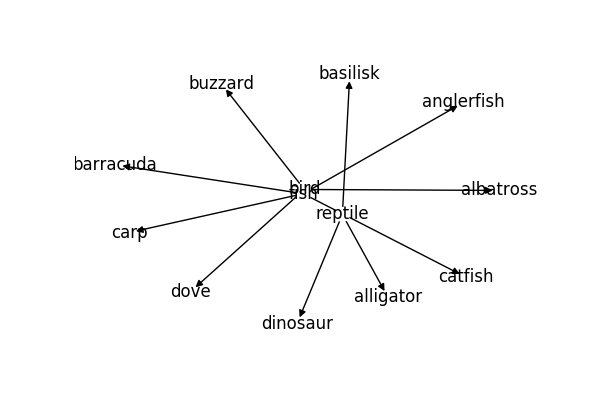

In [30]:
Image(render_graph( G.subgraph(selected_nodes), folder_images = "./", image_name = "cycle_graph.png"))

In [32]:
# max_branch = nx.algorithms.tree.branchings.maximum_branching(G.subgraph(selected_nodes))
# max_branch.nodes

# Get all the trees as connected components! 

In [33]:
connext_de = nx.connected_components(G.to_undirected())
connext_de

<generator object connected_components at 0x7f56f6afa750>

In [34]:
trees_nodes = []
for nodes in connext_de:
    trees_nodes.append(nodes)

trees_nodes is a list of sets, where each set contains the variables of one of the trees.

In [35]:
trees_nodes

[{'aardwolf',
  'alpaca',
  'anteater',
  'armadillo',
  'badger',
  'bear',
  'bovid',
  'canid',
  'capybara',
  'cat',
  'cheetah',
  'dog',
  'mammal',
  'rabbit'},
 {'donkey', 'hoofed'},
 {'amphibian', 'animal', 'goat'},
 {'domesticated', 'horse'},
 {'boar', 'chicken', 'kept', 'pig'},
 {'aardvark', 'burrowing'},
 {'alligator', 'basilisk', 'dinosaur', 'reptile'},
 {'albatross', 'bird', 'buzzard', 'dove', 'vertebrate'},
 {'list', 'number'},
 {'anaconda', 'snake'},
 {'anglerfish', 'barracuda', 'carp', 'catfish', 'fish'},
 {'Any', 'angelfish'},
 {'ant',
  'aphid',
  'bedbug',
  'beetle',
  'bug',
  'butterfly',
  'dragonfly',
  'insect'},
 {'antelope', 'ruminant'},
 {'ape', 'primate'},
 {'asp', 'viper'},
 {'baboon', 'monkey'},
 {'bandicoot', 'bison', 'native'},
 {'barnacle', 'crustacean'},
 {'bass', 'voice'},
 {'bat', 'implement'},
 {'beaver', 'dormouse', 'rodent'},
 {'bee', 'honeybee'},
 {'blackbird', 'thrush'},
 {'boa', 'live'},
 {'bobcat', 'species'},
 {'bobolink', 'songbird'},
 {'

In [36]:
subgraph = G.subgraph(list_elements[0])

NameError: name 'list_elements' is not defined

In [37]:
type(subgraph)

NameError: name 'subgraph' is not defined

In [38]:
subgraph.is()

SyntaxError: invalid syntax (<ipython-input-38-de4988af703d>, line 1)

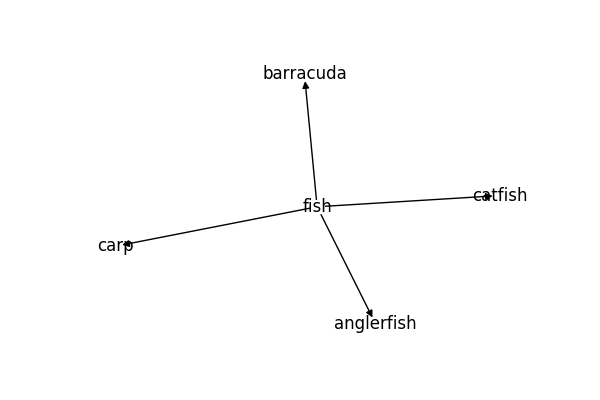

In [48]:
Image(render_graph( G.subgraph(trees_nodes[10]), folder_images = "./", image_name = "cycle_graph.png"))

# Caca

In [ ]:
doc = nlp(definition)
json_doc = doc.to_json()
for token in json_doc["tokens"]:
    print(json_doc["text"][token["start"]:token["end"]], token["pos"], token["tag"], token["dep"])

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.treemap(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [ ]:
px.data.tips()